## Créer un réseau à partir des données wikipédia

- récupérer les données de wikipédia
- les mettre sous une forme de réseau
- les sauvegarder dans un format ouvrable avec Gephi

In [2]:
!pip install wikipedia

In [3]:
import wikipedia

In [5]:
wikipedia.__version__

(1, 4, 0)

In [32]:
wikipedia.set_lang("fr")

In [7]:
wikipedia.page?

In [33]:
wikipedia.search("COVID",results=10)

['Maladie à coronavirus 2019',
 'Pandémie de Covid-19 en France',
 'Maladie à coronavirus',
 'Pandémie de Covid-19',
 'Pandémie de Covid-19 par pays et territoire',
 'Vaccin contre la Covid-19',
 'Covid long',
 "Vaccin d'AstraZeneca-Oxford contre la Covid-19",
 'Pandémie de Covid-19 en Europe',
 'Statistiques sur la pandémie de Covid-19 en France']

In [35]:
page = wikipedia.page(title='Maladie à coronavirus 2019')

In [36]:
page.title

'Maladie à coronavirus 2019'

In [37]:
page.url

'https://fr.wikipedia.org/wiki/Maladie_%C3%A0_coronavirus_2019'

In [38]:
page.content

'La maladie à coronavirus 2019  ou la, ou le, Covid-19  (acronyme anglais de coronavirus disease 2019), est une maladie infectieuse émergente de type zoonose virale causée par la souche de coronavirus SARS-CoV-2. Les symptômes les plus fréquents sont la fièvre, la toux, la fatigue et la gêne respiratoire. Dans les formes les plus graves, l\'apparition d\'un syndrome de détresse respiratoire aiguë peut entraîner la mort, notamment chez les personnes plus fragiles du fait de leur âge ou en cas de comorbidités. Une autre complication mortelle est une réponse exacerbée du système immunitaire inné (choc cytokinique).\nUne perte brutale de l\'odorat (anosmie), associée ou non à une perte du goût (agueusie), est une manifestation relativement fréquente et parfois révélatrice de l\'infection par le SARS-CoV-2.\nLe taux de formes asymptomatiques est estimé à près de 20 % des personnes infectées. La transmission interhumaine se fait surtout par gouttelettes respiratoires et aérosolisation,, lors

In [39]:
len(page.links)

1101

In [40]:
page_maladies = wikipedia.page("Liste des maladies")

In [41]:
page_maladies.title

'Liste des maladies'

In [42]:
page_maladies.links

["CIM-10 Chapitre 10 : Maladies de l'appareil respiratoire",
 'Dermatologie',
 'Liste de cancers',
 'Liste de maladies rares',
 'Liste des maladies et troubles oculaires',
 'Liste des maladies génétiques à gène identifié',
 'Liste des maladies génétiques à gène non identifié',
 'Liste des maladies infectieuses',
 'Liste des troubles mentaux',
 'Maladie',
 'Maladie cardiovasculaire',
 'Maladie génétique',
 'Maladie héréditaire',
 'Maladie infantile',
 'Maladie liée au mode de vie',
 'Maladie mentale',
 'Maladie opportuniste',
 'Maladie sexuellement transmissible',
 'Maladie transmissible',
 'Maladie virale',
 'Pathologie végétale',
 "Trouble de l'humeur"]

Compréhension de liste (list comprehension)

In [45]:
[i for i in [1,2,3,4,5] if i != 2]

[1, 3, 4, 5]

In [92]:
liste_nettoyee = [i for i in page_maladies.links if i != "Maladie"]

In [93]:
corpus = {i:wikipedia.page(lien) for lien in liste_nettoyee}

In [44]:
# création d'un corpus vide
corpus = {}

# boucle sur tous les liens
for lien in page_maladies.links:
    
    # récupération de la page en cours
    page_en_cours = wikipedia.page(lien)

    # mise de la page dans le corpus
    corpus[lien] = page_en_cours
    
    # affichage
    print(lien)

CIM-10 Chapitre 10 : Maladies de l'appareil respiratoire
Dermatologie
Liste de cancers
Liste de maladies rares
Liste des maladies et troubles oculaires
Liste des maladies génétiques à gène identifié
Liste des maladies génétiques à gène non identifié
Liste des maladies infectieuses
Liste des troubles mentaux
Maladie
Maladie cardiovasculaire
Maladie génétique
Maladie héréditaire
Maladie infantile
Maladie liée au mode de vie
Maladie mentale
Maladie opportuniste
Maladie sexuellement transmissible
Maladie transmissible
Maladie virale
Pathologie végétale
Trouble de l'humeur


In [48]:
len(corpus)

22

Création d'un corpus de liens

In [51]:
corpus_liens = {i:corpus[i].links for i in corpus}

In [52]:
corpus_liens = {}
for i in corpus:
    corpus_liens[i] = corpus[i].links

Décrire un peu le corpus

In [53]:
len(corpus)

22

Construire la liste de tous les liens atteints au niveau 1

In [54]:
total_liens = []
for i in corpus_liens:
    total_liens = total_liens + corpus_liens[i]

In [55]:
len(total_liens)

5528

In [56]:
len(set(total_liens))

3483

In [62]:
import pandas as pd
%matplotlib inline
c = pd.Series(total_liens)
c.value_counts()

Médecine                              12
Maladie d'Alzheimer                   10
International Standard Book Number     9
Maladie de Crohn                       8
Maladie de Huntington                  8
                                      ..
Enterobius vermicularis                1
Psychologue                            1
Atrichie                               1
Épilepsie myoclonique juvénile         1
Prion (protéine)                       1
Length: 3483, dtype: int64

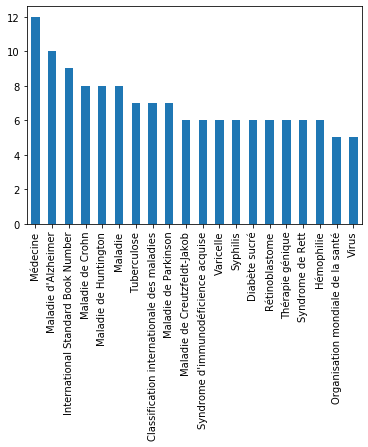

In [63]:
c.value_counts()[0:20].plot(kind="bar")

## Construire un réseau

In [64]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [65]:
import networkx as nx

In [66]:
mon_graph = nx.Graph()

In [67]:
type(mon_graph)

networkx.classes.graph.Graph

In [69]:
mon_graph.edges

EdgeView([])

In [70]:
mon_graph.add_node("Premier noeud",weight=10)

In [72]:
mon_graph.nodes.data()

NodeDataView({'Premier noeud': {'weight': 10}})

In [73]:
mon_graph.add_node("Deuxième noeud",weight=2)

In [74]:
mon_graph.add_node("Troisième noeud",weight=1)

In [75]:
mon_graph.add_edge("Premier noeud","Deuxième noeud")

In [77]:
mon_graph.nodes.data()

NodeDataView({'Premier noeud': {'weight': 10}, 'Deuxième noeud': {'weight': 2}, 'Troisième noeud': {'weight': 1}})

In [78]:
mon_graph.edges.data()

EdgeDataView([('Premier noeud', 'Deuxième noeud', {})])

Calculs de statistiques

In [79]:
mon_graph.degree()

DegreeView({'Premier noeud': 1, 'Deuxième noeud': 1, 'Troisième noeud': 0})

Créer notre réseau

In [81]:
len(corpus_liens)

22

In [94]:
# Création du réseau vide
reseau = nx.Graph()

# Boucle sur les éléments du corpus (chaque page)
for p in corpus_liens:
    
    # Si le noeud existe
    if reseau.has_node(p):
        reseau.nodes[p]["poids"]+=1 # augmente l'attribut poids de 1
    else:
        reseau.add_node(p,poids=1) # sinon le créer
        
    # Parcourir les links de la page et les ajouter
    for link in corpus_liens[p]:
        if reseau.has_node(link):
            reseau.nodes[link]["poids"]+=1
        else:
            reseau.add_node(link,poids=1)
            
        # Si la connexion page lien n'existe pas la créer
        if not reseau.has_edge(p,link):
            reseau.add_edge(p,link)

In [95]:
len(reseau.nodes)

3489

In [96]:
len(reseau.edges)

5521

Faire des statistiques

In [98]:
nx.density(reseau)

0.0009073405013397283

Ecrire dans un fichier

In [99]:
nx.write_graphml(reseau,"mon_reseau_wiki.graphml")

## Visualisation

Text(0.5, 1.0, 'Un réseau')

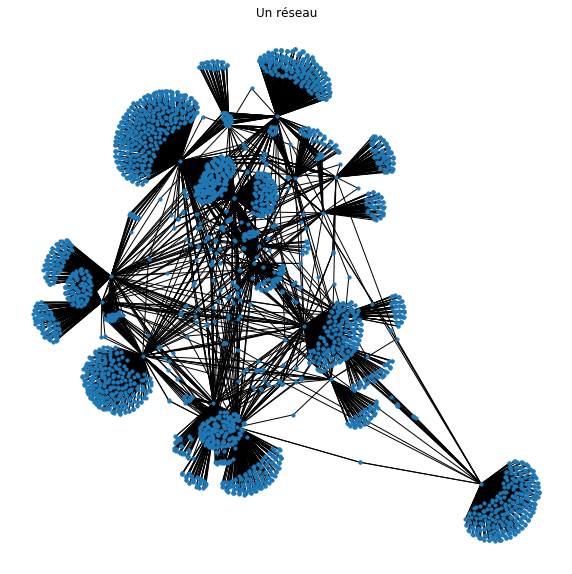

In [103]:
import matplotlib.pyplot as plt

# Créer une nouvelle figure de graphique
fig,ax = plt.subplots(figsize=(10,10))

# Calculer la répartition des noeuds dans l'espace (demandeur en calcul)
#position = nx.spring_layout(reseau)

# Tracer la figure
nx.draw(reseau, pos = position, node_size=10)

# Ajouter des éléments
ax.set_title("Un réseau")